# Hello, this is the beginning of my attempt to read this file! Enjoy :)

In [1]:
#here are all my imports
import pandas as pd

In [2]:
taxi14 = pd.read_csv("data/nyc_taxi_data_2014.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
taxi14.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,CMT,2014-01-09 20:45:25,2014-01-09 20:52:31,1,0.7,-73.994770,40.736828,1,N,-73.982227,40.731790,CRD,6.5,0.5,0.5,1.40,0.0,8.90
1,CMT,2014-01-09 20:46:12,2014-01-09 20:55:12,1,1.4,-73.982392,40.773382,1,N,-73.960449,40.763995,CRD,8.5,0.5,0.5,1.90,0.0,11.40
2,CMT,2014-01-09 20:44:47,2014-01-09 20:59:46,2,2.3,-73.988570,40.739406,1,N,-73.986626,40.765217,CRD,11.5,0.5,0.5,1.50,0.0,14.00
3,CMT,2014-01-09 20:44:57,2014-01-09 20:51:40,1,1.7,-73.960213,40.770464,1,N,-73.979863,40.777050,CRD,7.5,0.5,0.5,1.70,0.0,10.20
4,CMT,2014-01-09 20:47:09,2014-01-09 20:53:32,1,0.9,-73.995371,40.717248,1,N,-73.984367,40.720524,CRD,6.0,0.5,0.5,1.75,0.0,8.75


In [4]:
taxi14.shape

(14999999, 18)

In [ ]:
##we dont need to rename any of the columns

In [28]:
taxi14.dtypes

vendor_id                     object
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
trip_distance                float64
pickup_longitude             float64
pickup_latitude              float64
rate_code                      int64
store_and_fwd_flag            object
dropoff_longitude            float64
dropoff_latitude             float64
payment_type                  object
fare_amount                  float64
surcharge                    float64
mta_tax                      float64
tip_amount                   float64
tolls_amount                 float64
total_amount                 float64
dtype: object

## Data QA

### Check for duplictes

In [45]:
taxi14['unique_model'] = taxi14.vendor_id.str.cat(
    [taxi14.pickup_datetime.apply(str), taxi14.dropoff_datetime.apply(str)],sep='-')

In [46]:
taxi14[["vendor_id", "pickup_datetime", "dropoff_datetime", "unique_model"]].head()

,vendor_id,pickup_datetime,dropoff_datetime,unique_model
0,CMT,2014-01-09 20:45:25,2014-01-09 20:52:31,CMT-2014-01-09 20:45:25-2014-01-09 20:52:31
1,CMT,2014-01-09 20:46:12,2014-01-09 20:55:12,CMT-2014-01-09 20:46:12-2014-01-09 20:55:12
2,CMT,2014-01-09 20:44:47,2014-01-09 20:59:46,CMT-2014-01-09 20:44:47-2014-01-09 20:59:46
3,CMT,2014-01-09 20:44:57,2014-01-09 20:51:40,CMT-2014-01-09 20:44:57-2014-01-09 20:51:40
4,CMT,2014-01-09 20:47:09,2014-01-09 20:53:32,CMT-2014-01-09 20:47:09-2014-01-09 20:53:32


In [47]:
taxi14.unique_model.value_counts()

VTS-2014-01-22 14:21:00-2014-01-22 14:21:00    39
VTS-2014-01-02 18:32:00-2014-01-02 18:39:00    38
VTS-2014-01-08 21:01:00-2014-01-08 21:08:00    37
VTS-2014-01-02 18:48:00-2014-01-02 18:54:00    36
VTS-2014-01-07 19:49:00-2014-01-07 19:53:00    36
VTS-2014-01-06 19:24:00-2014-01-06 19:29:00    36
VTS-2014-01-16 19:00:00-2014-01-16 19:07:00    36
VTS-2014-01-11 18:10:00-2014-01-11 18:18:00    35
VTS-2014-01-11 19:47:00-2014-01-11 19:57:00    35
VTS-2014-01-10 19:43:00-2014-01-10 19:51:00    35
VTS-2014-01-28 20:14:00-2014-01-28 20:19:00    35
VTS-2014-01-08 18:43:00-2014-01-08 18:49:00    34
VTS-2014-01-12 00:04:00-2014-01-12 00:10:00    34
VTS-2014-01-19 21:56:00-2014-01-19 22:02:00    34
VTS-2014-01-27 20:17:00-2014-01-27 20:23:00    34
VTS-2014-01-15 20:33:00-2014-01-15 20:43:00    34
VTS-2014-01-02 18:50:00-2014-01-02 18:55:00    34
VTS-2014-01-31 21:54:00-2014-01-31 22:02:00    34
VTS-2014-01-25 14:23:00-2014-01-25 14:30:00    34
VTS-2014-01-25 22:58:00-2014-01-25 23:05:00    34


In [48]:
taxi14[taxi14.unique_model=='VTS-2014-01-22 14:21:00-2014-01-22 14:21:00'].head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,unique_model
2060196,VTS,2014-01-22 14:21:00,2014-01-22 14:21:00,1,0.0,-73.937778,40.75825,1,NaN,-73.937762,40.75826,CSH,2.5,0.0,0.5,0.0,0.0,3.0,VTS-2014-01-22 14:21:00-2014-01-22 14:21:00
2068886,VTS,2014-01-22 14:21:00,2014-01-22 14:21:00,1,0.0,-73.937778,40.75825,1,NaN,-73.937762,40.75826,CSH,2.5,0.0,0.5,0.0,0.0,3.0,VTS-2014-01-22 14:21:00-2014-01-22 14:21:00
2092823,VTS,2014-01-22 14:21:00,2014-01-22 14:21:00,1,0.0,-73.937778,40.75825,1,NaN,-73.937762,40.75826,CSH,2.5,0.0,0.5,0.0,0.0,3.0,VTS-2014-01-22 14:21:00-2014-01-22 14:21:00
2103124,VTS,2014-01-22 14:21:00,2014-01-22 14:21:00,1,0.0,-73.937778,40.75825,1,NaN,-73.937762,40.75826,CSH,2.5,0.0,0.5,0.0,0.0,3.0,VTS-2014-01-22 14:21:00-2014-01-22 14:21:00
2106681,VTS,2014-01-22 14:21:00,2014-01-22 14:21:00,1,0.0,-73.937778,40.75825,1,NaN,-73.937762,40.75826,CSH,2.5,0.0,0.5,0.0,0.0,3.0,VTS-2014-01-22 14:21:00-2014-01-22 14:21:00


In [49]:
taxi14[taxi14.duplicated()].shape

(98, 19)

In [50]:
taxi14 = taxi14.drop_duplicates()
taxi14.shape

(14999901, 19)

In [51]:
del taxi14['unique_model']

### Check for missing values

In [52]:
n_records = len(taxi14)
def missing_values_df(df):
    for column in df:
        print("{} | {} | {}".format(
            column, len(df[df[column].isnull()]) / (1.0*n_records), df[column].dtype
        ))

missing_values_df(taxi14)

vendor_id | 0.0 | object
pickup_datetime | 0.0 | datetime64[ns]
dropoff_datetime | 0.0 | datetime64[ns]
passenger_count | 0.0 | int64
trip_distance | 0.0 | float64
pickup_longitude | 0.0 | float64
pickup_latitude | 0.0 | float64
rate_code | 0.0 | int64
store_and_fwd_flag | 0.5090686265196017 | object
dropoff_longitude | 9.666730467087749e-06 | float64
dropoff_latitude | 9.666730467087749e-06 | float64
payment_type | 0.0 | object
fare_amount | 0.0 | float64
surcharge | 0.0 | float64
mta_tax | 0.0 | float64
tip_amount | 0.0 | float64
tolls_amount | 0.0 | float64
total_amount | 0.0 | float64


In [59]:
taxi14.store_and_fwd_flag.value_counts()

N    7196241
Y     167681
Name: store_and_fwd_flag, dtype: int64

In [58]:
taxi14.store_and_fwd_flag.isnull().sum()

7635979

In [60]:
del taxi14['store_and_fwd_flag']

In [61]:
taxi14 = taxi14.dropna(subset=["dropoff_longitude", "dropoff_latitude"])

taxi14.shape

(14999756, 17)

### Check for outliers

In [ ]:
taxi14.vendor_id.value_counts()

In [ ]:
taxi14.passenger_count.value_counts()

In [ ]:
df = df.drop(df[(df.score < 50) & (df.score > 20)].index)

In [ ]:
taxi14.boxplot(column='passenger_count');

In [ ]:
from scipy import stats
import numpy as np

def outliers_col(df):
    for column in df:
        if df[column].dtype == np.float:
            n_outliers = len(df[np.abs(stats.zscore(df[column])) > 3])    
            print("{} | {} | {}".format(
                df[column].name,
                n_outliers,
                df[column].dtype
        ))

outliers_col(taxi14)

## Exploring data types

In [ ]:
for col in ['vendor_id', 'playgrounds', 'sports', 'roading']:
    public[col] = public[col].astype('category')

In [14]:
taxi14['pickup_datetime'] =  pd.to_datetime(taxi14['pickup_datetime'], format='%Y-%m-%d %H:%M:%S.%f')

In [27]:
taxi14['dropoff_datetime']= pd.to_datetime(taxi14['dropoff_datetime'], format='%Y-%m-%d %H:%M:%S.%f')

## Preliminary data visualization

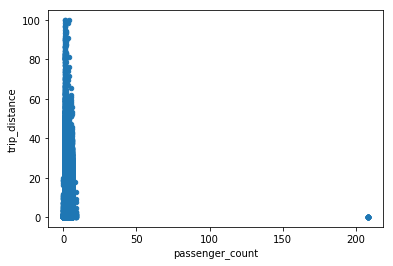

In [35]:
import matplotlib.pyplot as plt
taxi14.plot.scatter(x="passenger_count", y="trip_distance");
plt.show()

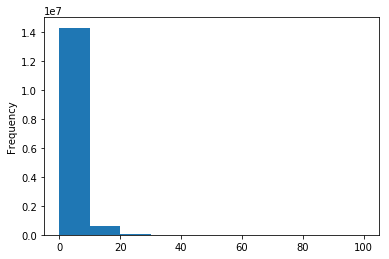

In [36]:
taxi14.trip_distance.plot.hist(xlim=(0,35));

KeyboardInterrupt: 

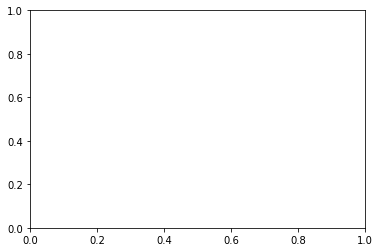

In [37]:
taxi14.passenger_count.plot.kde();

In [ ]:
ttlamount_by_passenger = taxi14.groupby("passenger_count")["total_amount"].mean()
ttlamount_by_passenger.head()
ttlamount_by_passenger.head(10).plot.barh();

In [ ]:
taxi14.vendor_id.value_counts().plot.pie();

ignore this.


ndf = taxi14['pickup_datetime'].str.split(' ',expand=True).rename(columns={0:"pickup_date", 1:'pickup_time'})
taxi14 = pd.concat([taxi14,ndf],1)
taxi14 = taxi14.drop(['pickup_datetime'],1)

ndf = taxi14['dropoff_datetime'].str.split(' ',expand=True).rename(columns={0:"dropoff_date", 1:'dropoff_time'})
taxi14 = pd.concat([taxi14,ndf],1)
taxi14 = taxi14.drop(['dropoff_datetime'],1) ##

#split the date and time on the space abd delete the original columns